In [1]:
import time

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import cupy as cp

import ducc0
from delensalot.sims.sims_lib import Xunl, Xsky, Xobs
from lenspyx import cachers
import pysht

mode = 'SHT'

def get_toydata(lmax=1024, mmax=1024, geominfo=('gl',{'lmax': 1024})):
    ll = np.arange(0,lmax)
    # geominfo = ('gl',{'lmax': lmax})
    # geominfo = ('healpix',{'nside': 512})

    synunl = Xunl(lmax=lmax, geominfo=geominfo)
    synsky = Xsky(lmax=lmax, unl_lib=synunl, geominfo=geominfo)

    philm = synunl.get_sim_phi(0, space='alm')
    dlm = hp.almxfl(philm, np.sqrt(ll*(ll+1)))

    Tunl = synunl.get_sim_unl(0, spin=0, space='alm', field='temperature')
    # Tsky = synsky.get_sim_sky(0, spin=0, space='map', field='temperature')

    return Tunl, dlm, philm
# int(t.geom.nph[0]/2-1)


def synthesis(t, Tunl, solver, lmax):
    defres = t.synthesis(Tunl.copy(), lmax=lmax, mmax=lmax, spin=0, nthreads=4)
    return defres

solvers = ['ducc', 'shtns']

mpisupport: True, pmisupport: False
disabling mpi
[SHTns 3.6.1] built Feb 28 2024, 17:29:06, id: v3.6.1-41-g3d56397*,avx512,ishioka,openmp
Using lenspyx alm2map


In [3]:
solver = 'shtns'
mode = 'SHT'
backend = 'GPU'
t = pysht.get_transformer(solver, mode, backend)

bm_GPU = []
for lmax in 256*np.arange(1,16):
    mmax = lmax
    geominfo = ('gl',{'lmax': lmax})
    t.set_geometry(geominfo)

    Tunl, dlm, philm = get_toydata(lmax, mmax, geominfo)
    result = %timeit -o -n1 -r1 synthesis(t, Tunl, solver, lmax)
    bm_GPU.append([lmax, result])
    

INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU


INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
674 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
4.32 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
INFO:: 02-28 17:31:06:: delensalot.sims.sims_lib.__init__ - sht

In [2]:
solver = 'ducc'
backend = 'CPU'
mode = 'SHT'
t = pysht.get_transformer(solver, mode, backend)

if 'defres' in locals():
    defres = np.array(defres)
    ptg = np.array(ptg)
    map_dfs = np.array(map_dfs)

bm_CPU = []
for lmax in 256*np.arange(1,16):
    mmax = lmax
    geominfo = ('gl',{'lmax': lmax})
    t.set_geometry(geominfo)

    Tunl, dlm, philm = get_toydata(lmax, mmax, geominfo)
    result = %timeit -o -n1 -r1 synthesis(t, Tunl, solver, lmax)
    bm_CPU.append([lmax, result])

INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU


1.59 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
7.69 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:30:27:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
19.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop eac

In [37]:
solver = 'shtns'
backend = 'CPU'
t = pysht.get_transformer(solver, mode, backend)


if 'defres' in locals():
    defres = np.array(defres)
    ptg = np.array(ptg)
    map_dfs = np.array(map_dfs)

bm_CPU_shtns = []
for lmax in 256*np.arange(1,16):
    geominfo = ('gl',{'lmax': lmax, 'mmax':lmax})
    t.set_geometry(geominfo)

    Tunl, dlm, philm = get_toydata(lmax, mmax, geominfo)
    result = %timeit -o -n1 -r1 synthesis(t, Tunl, solver, lmax)
    bm_CPU_shtns.append([lmax, result])

INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU


INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
542 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:07:50:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
2.25 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
INFO:: 02-28 17:07:51:: delensalot.sims.sims_lib.__init__ - sht_solver not given, defaulting to ducc
INFO:: 02-28 17:07:51:: delensalot.sims.sims_lib.__init__ - sht_backend not given, defaulting to CPU
INFO:: 02-28 17:07:51:: delensalot.sims.sims_lib.__init__ - sht

KeyboardInterrupt: 

In [44]:
solver = 'shtns'
backend = 'CPU'
mode='SHT'
lmax = 1000
import pysht
t = pysht.get_transformer(solver, mode, backend)
geominfo_ = ('gl',{'lmax': lmax, 'mmax': lmax})
t.set_geometry(geominfo_)
t.constructor.print_info()

In [19]:
solver = 'shtns'
backend = 'GPU'
mode='SHT'
lmax = 1000
import pysht
t = pysht.get_transformer(solver, mode, backend)
geominfo_ = ('gl',{'lmax': lmax})
t.set_geometry(geominfo_)
t.constructor.print_info()

<bound method CPU_SHT_SHTns_transformer.synthesis of <pysht.sht.CPU_sht_transformer.CPU_SHT_SHTns_transformer object at 0x155457137c70>>

Text(0.5, 1.0, 'SHT time for different lmax')

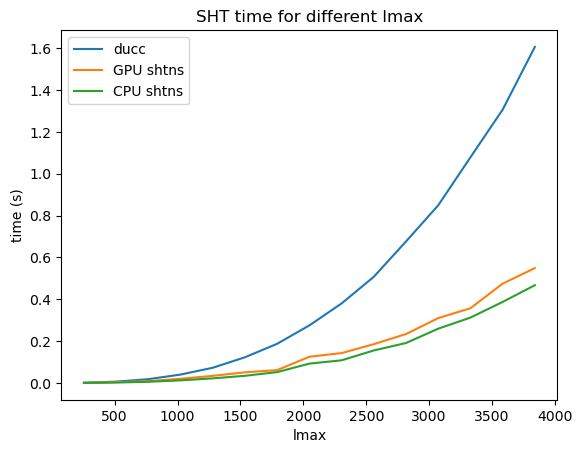

In [15]:
plt.plot([bC[0] for bC in bm_CPU], [bC[1].average for bC in bm_CPU], label='ducc')
plt.plot([bG[0] for bG in bm_GPU], [bG[1].average for bG in bm_GPU], label='GPU shtns')
plt.plot([bC[0] for bC in bm_CPU_shtns], [bC[1].average for bC in bm_CPU_shtns], label='CPU shtns')
plt.legend()
plt.ylabel('time (s)')
plt.xlabel('lmax')
plt.title('SHT time for different lmax')

Text(0.5, 1.0, 'speedup')

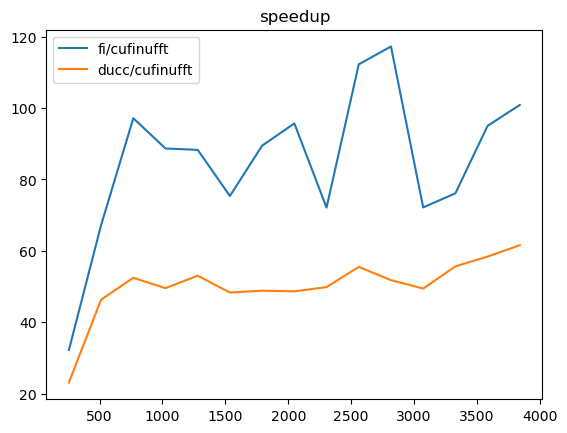

In [30]:
plt.plot([bC[0] for bC in bm_CPU], [bC[1].average/bG[1].average for bC, bG in zip(bm_CPU, bm_GPU)], label='fi/cufinufft')
plt.plot([bC[0] for bC in bm_CPU], [bC[1].average/bG[1].average for bC, bG in zip(bm_CPU_ducc, bm_GPU)], label='ducc/cufinufft')
plt.legend()
# plt.plot([bG[0] for bG in bm_GPU], [bG[1].average for bG in bm_GPU], label='cufinufft')
# plt.plot([bC[0] for bC in bm_CPU_ducc], [bC[1].average for bC in bm_CPU_ducc], label='duccnufft')
plt.title('speedup')

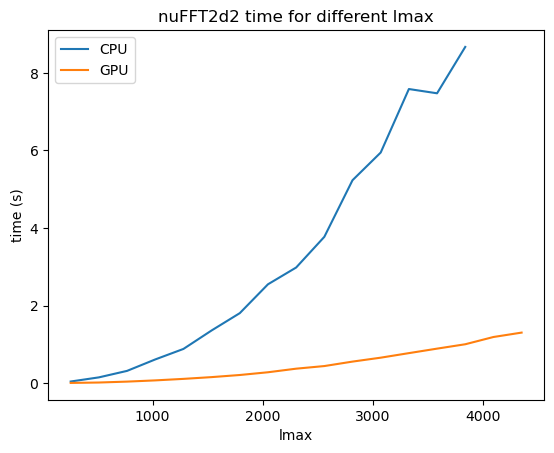